# Lab 06: Learning About Adults and Flowers

### Author: Declan Sheehan & Jack Stoetzel 

### Date: November 24, 2020

### Objectives:
1. Work on developing some simple supervised machine learning algorithms
2. Practice visualizing and presenting the behavior of a complex algorithm on data
3. Continue developing skills with Python, Jupyter notebooks, and data-processing libraries


In [1]:
import os
import math
import random
import operator
import pylab as pl
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

In [2]:
class kNN:
    def __init__(self, train_data, full_data, labels, k):
        super().__init__()
        self.k = k
        self.labels = labels
        self.distance = None
        self.train(train_data, full_data)
        
    def train(self, train_data, full_data):
        self.full_data = full_data
        self.train_data = array(delete(train_data, 2, 1), dtype=float)
        self.train_size = train_data.shape[0]
        
    def distances(self, sample):
        newsample = array(delete(sample, 2), dtype=float)
        diffMatrix = tile(newsample, (self.train_size, 1)) - self.train_data
        self.distance = ((diffMatrix ** 2).sum(axis = 1) ** 0.5)
        

    def predict(self, sample):
        self.distances(sample)
        sortedIndices = self.distance.argsort()
        
        label_count = []
        for i in range(len(self.labels)):
            label_count.append(0)
        
        Class = ''
        for num in range(self.k):
            votedPoints = sortedIndices[num]
            for label in self.labels:
                if self.full_data[votedPoints][2] == label:
                    label_count[self.labels.index(label)] += 1
                
        values = array(label_count).argsort()
        Class = self.labels[values[len(self.labels)-1]]
        
        return Class
    
    def print_plot(self, sample):
        plots = []
        for i in range(len(self.labels)):
            plots.append(([], []))
        
        for num in range(self.train_size):
            plots[self.labels.index(self.full_data[num][2])][0].append(self.train_data[num][0])
            plots[self.labels.index(self.full_data[num][2])][1].append(self.train_data[num][1])
                
        plt.figure(figsize=(10, 10))
        for sett in plots:
            plt.scatter(sett[0], sett[1])
            
        plt.scatter(sample[0], sample[1])
        plt.scatter(sample[0], sample[1], s=25000, facecolors='none', edgecolors='r')
        plt.legend(self.labels)
        plt.show()

################################################################
        
# Generates a given number of points from (0.0, 0.0) to (50.0, 50.0)
# and gives them a color based on positioning.
def generate_data(size):
    full_data = []
    part_data = []
    for i in range(size):
        x = random.uniform(0, 50)
        y = random.uniform(0, 50)

        if x >= 24 and y <= 24:
            full_data.append([x, y, 'blue'])
        elif x <= 24 and y >= 24:
            full_data.append([x, y, 'yellow'])
        else:
            full_data.append([x, y, 'green'])
        part_data.append([x, y])
    return full_data

# Task 3 split data method.
def splitData(full_data, p):
    random.shuffle(full_data)
    n = len(full_data)
    training, full, testing = [], [], []
    for num in range(math.floor(int(n * (1 - p)))):
        testing.append(full_data[num])
    for num in range(math.floor(int(n * p))):
        training.append(full_data[num + math.floor(int(n * (1 - p)))])
        full.append(full_data[num + math.floor(int(n * (1 - p)))])
                   
    return training, testing, full

# For reformatting a data from into an array for the kNN class
def reformat(frame):
    full_data = []
    for i in frame.values:
        full_data.append([i[0], i[1], i[2]])
    return full_data



Point 14.963330056929836 , 2.683363590208099 is yellow


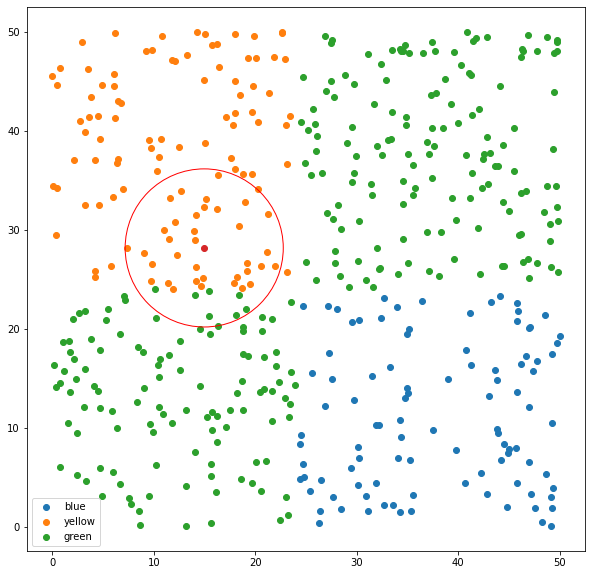

In [3]:
# Generate and split the data.
full_data = generate_data(500)
training_data, testing_data, full_data = splitData(full_data, 0.95)

# Test the data and print out a result.
model = kNN(array(training_data), array(full_data), ['blue', 'yellow', 'green'], 25)
prediction = model.predict(array(testing_data[0]))
print('Point', testing_data[0][0], ',', testing_data[1][0], 'is', prediction)
model.print_plot(testing_data[0])

In [4]:
iris = pd.read_csv('./iris.data',
                      header=None,
                      skipinitialspace=True,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
                     )

Training Size - [Correct, Incorrect]
30 - [39, 81]
45 - [93, 12]
60 - [84, 6]
75 - [73, 2]
90 - [57, 3]
105 - [42, 3]
120 - [27, 2]
135 - [13, 1]


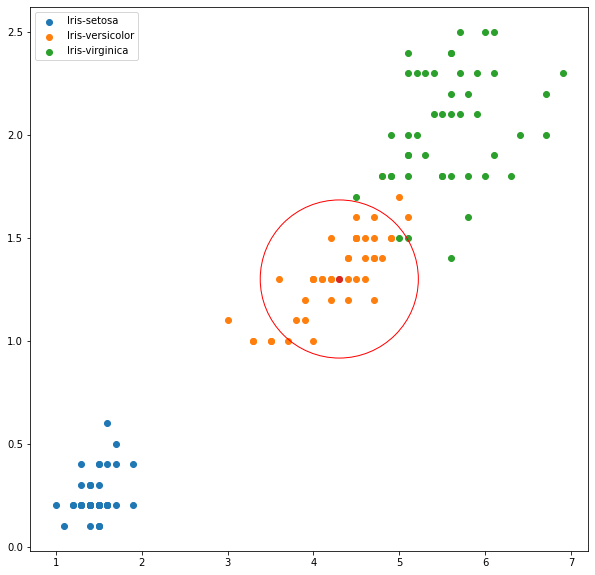

In [16]:
# 3.a. Show some confusion matrices for different size testing versus training datasets.

petals = iris[["petal_length", "petal_width", "class"]]

full_data = reformat(petals)

print("Training Size - [Correct, Incorrect]")
for p in range(2, 10):
    answers = [0,0]
    full_data = reformat(petals)
    training_data, testing_data, full_data = splitData(full_data, (p/10))
    iris_model = kNN(array(training_data), array(full_data), ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 25)
    for entry in testing_data:
        prediction = iris_model.predict(array(entry))
        if entry[2] == prediction:
            answers[0] += 1
        else:
            answers[1] += 1
    print(f"{iris_model.train_size} - {answers}")

###### 3.b. How does the accuracy change for different size training sets? Show how the accuracy changes within the training set and testing set separately.
With the increase in training size, the number of correct vs. incorrect prediction begins to increase significatly. Because there are less points to learn off of, the chances of different class types being "close" togther is more likely. Whereas, when the training size is increased, the chance of samples of the same class being in the same area is more likely, and therfore will produce more accurate data.

In [17]:
print("Training Size - [Correct, Incorrect]")
full_data = reformat(sepals)
for p in range(1, 20):
    answers = [0,0]
    full_data = reformat(sepals)
    training_data, testing_data, full_data = splitData(full_data, .95)
    iris_model = kNN(array(training_data), array(full_data), ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 25)
    for entry in testing_data:
        prediction = iris_model.predict(array(entry))
        if entry[2] == prediction:
            answers[0] += 1
        else:
            answers[1] += 1

    print(f"{iris_model.train_size} - {answers}")

Training Size - [Correct, Incorrect]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [6, 1]
142 - [7, 0]
142 - [7, 0]
142 - [6, 1]
142 - [6, 1]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [6, 1]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]
142 - [7, 0]


###### 3.c. What if you repeat this process, keeping the training fraction p the same? Does the accuracy change drastically based on the “quality” of the testing set? How might you quantify this behavior?

Keeping the p value the same, we see the results are very conisitent. This means that we have a good quality of data,and there are many flowers of the same class within a short "distance" of each other. So, when a petal length and width are given to be predicted, it is likely to predict the correct result given that there are going to be many of the same class close to the prediction point. 

In [7]:
adults = pd.read_csv('./adult.data',
                      header=None,
                      skipinitialspace=True,
                      names=[
                             'age', 'workclass', 'fnlwgt', 'education',
                             'education_num', 'marital_status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hours_per_week', 'native_country', 'income'
                            ]
                     )
adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


###### 4.a. How can you try to quantify the “distance” between two adults? 

Because of how our data is set up, the easiest way to quantify the distance between two adults would be to use numeric data that is already present in the data. This includes, age, fnlwght, education_num, and hours_per_week. 

For the following, are going to test different combinations of age, education_num, and hours_per_week. These metrics will work well in our current 2D kNN class. 

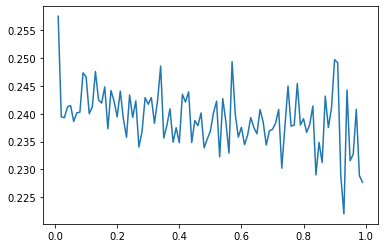

In [27]:
# Write some small python functions to try and transform this data into something that can be used by 
# the kNN classifier. Try a couple different approaches, report their different behaviors and 
# illustrate using learning curves, confusion matrices, and possibly some statistical measurements.

age_hours = adults[["age", "hours_per_week", "income"]]

full_data = reformat(age_hours)

x = []
y = []
for p in range(1, 100):
    answers = [0,0]
    full_data = reformat(age_hours)
    training_data, testing_data, full_data = splitData(full_data, (p/100))
    adults_model = kNN(array(training_data), array(full_data), ['<=50K', '>50K'], 25)
    for entry in testing_data:
        prediction = adults_model.predict(array(entry))
        if entry[2] == prediction:
            answers[0] += 1
        else:
            answers[1] += 1

    x.append(p/100)
    y.append(answers[1] / (answers[0] + answers[1]))
    
plt.plot(x, y)

In [ ]:
age_hours = adults[["age", "education_num", "income"]]

full_data = reformat(age_hours)

x = []
y = []
for p in range(1, 100):
    answers = [0,0]
    full_data = reformat(age_hours)
    training_data, testing_data, full_data = splitData(full_data, (p/100))
    adults_model = kNN(array(training_data), array(full_data), ['<=50K', '>50K'], 25)
    for entry in testing_data:
        prediction = adults_model.predict(array(entry))
        if entry[2] == prediction:
            answers[0] += 1
        else:
            answers[1] += 1

    x.append(p/100)
    y.append(answers[1] / (answers[0] + answers[1]))
    
plt.plot(x, y)

In [ ]:
age_hours = adults[["hours_per_week", "education_num", "income"]]

full_data = reformat(age_hours)

x = []
y = []
for p in range(1, 100):
    answers = [0,0]
    full_data = reformat(age_hours)
    training_data, testing_data, full_data = splitData(full_data, (p/100))
    adults_model = kNN(array(training_data), array(full_data), ['<=50K', '>50K'], 25)
    for entry in testing_data:
        prediction = adults_model.predict(array(entry))
        if entry[2] == prediction:
            answers[0] += 1
        else:
            answers[1] += 1

    x.append(p/100)
    y.append(answers[1] / (answers[0] + answers[1]))
    
plt.plot(x, y)

###### 4.b. Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

Labels like workclass, martial_status, occupation, race, and sex. For a label like martial_status, we can look at metrics like age (older people are more likely to already be married), hours_per_week (households with two incomes might not need to work as much), and even income (calculating on a scale from 0 - 1, a person who is marriend might not need to make as much becasue there are two "providers" in a household). A label liek workclass can also be easily calculated using some of the same metrics but for different reasons. 